# 캐글 - 타이타닉 생존자 예측하기

## (2) 데이터 불러오기


Pandas DataFrames로 학습 데이터와 테스트 데이터를 불러온다.

In [19]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine = [train_df, test_df]

## (3) 데이터 분석

### 데이터에 어떤 특징이 있는 지 확인하기

In [20]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


__범주형 자료__
- 명목형: Survived, Sex, Embarked
- 순서형: Pclass

__수치형 자료__
- 연속형: Age, Fare
- 이산형: sibSp, Parch

In [21]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Mixed data types__

Ticket: 숫자 및 영숫자 자료형이 섞여 있다. <br>
Cabin: 영숫자로 이루어져있다.

__에러나 오타가 있을 가능성이 있는 특징__

Name feature: 이름을 줄여서 쓰거나 대체해서 쓸 때 여러 가지 방법이 있으므로 에러나 오타가 있을 가능성이 있다.


In [22]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__값이 비어있거나 null 또는 공백을 포함한 특징

- 학습 데이터에서 Cabin > Age > Embarked 특징 순으로, 많은 null 값을 갖고 있다.
- 테스트 데이터에서 Cabin > Age 는 불완전하다.

__자료형의 종류__

In [23]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

- 7개의 특징은 정수 또는 부동 소수점. 테스트 데이터의 경우 6개.
- 5개의 특징은 문자열(객체).

__표본에 대한 수치형 특징의 분포__

In [24]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 전체 표본의 개수는 891개로, 타이타닉호에 탑승한 실제 승객 수(2,224)의 40%다.
- Survived는 0과 1로 이루어진 범주형 특징이다.
- 32%의 실제 생존률을 대표하는, 약 38%의 표본이 생존(Survived)했다.
- 대부분의 승객(> 75%)은 부모나 자식(Parch)과 여행하지 않았다.
- 거의 30%의 승객이 형제 자매 및/또는 배우자(SibSp)와 탑승했다.
- 운임(Fare)을 $512까지 지불하는 승객(< 1%)은 거의 없었다.
- 65-80세의 노인 승객(< 1%)은 거의 없었다.

__표본에 대한 범주형 특징의 분포__

In [25]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnson, Master. Harold Theodor",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


- 이름(Name)은 데이터 내에서 고유하다. (count=unique=891)
- 성별(Sex)은 남성이 65%로, 두 가지 값으로 나뉜다. (top=male, freq=577/count=891)
- 선실(Cabin)은 표본 간 여러 중복이 있다. 또는 여러 승객이 선실을 같이 썼다.
- 승선(Embarked)은 세 가지 값으로 나뉜다. S 포트가 가장 많이 이용되었다. (top=S)
- 티켓(Ticket)은 높은 비율(22%)로 중복된 값을 갖는다. (unique=681)

### 데이터 분석에 근거한 가정

__Correlating__

각 특징이 생존과 어떤 상관관계가 있는 지 알고 싶다. 

__Completing__

1. Age 특징은 생존과 확실한 연관이 있으므로 완성할 수 있다.
2. Embarked 특징은 생존 또는 다른 중요한 특징과 관련이 있을 수 있으므로 완성할 수 있다.

__Correcting__

1. Ticket 특징은 중복 비율(22%)이 높고 티켓과 생존 간 상관 관계가 없기 때문에 분석에서 제외할 수 있다.
2. Cabin 특징은 꽤 불완전하며 null 값을 많이 포함하므로, 학습과 테스트 데이터 모두에서 제거할 수 있다.
3. PassengerId는 생존과 관련이 없으므로 학습 데이터에서 제거할 수 있다.
4. Name 특징은 상대적으로 비표준적이고 생존에 직접적으로 관련이 없으므로 제외할 수 있다.

__Creating__

1. Parch와 SibSp를 이용해 Family라는 새로운 특징을 만들어서 탑승한 총 가족 수를 확인할 수 있다.
2. Name 특징을 공학하여 Title(칭호)을 새로운 특징으로 추출할 수 있다.
3. Age bands(연령대) 특징을 새로 만들어서 연속 수치형 자료를 순서 범주형 자료로 변환할 수 있다.
4. 분석에 도움이 된다면, Fare range(운임 범위) 특징을 새로 만들 수 있다.

__Classifying__

앞에서 한 (1)문제 정의를 바탕으로, 가정을 추가할 수 있다.

1. 여자(Sex=female)의 생존 확률이 더 높다.
2. 아이(Age<?)의 생존 확률이 더 높다.
3. 상류층(Pclass=1)의 생존 확률이 더 높다.


### pivot 특징으로 분석

관찰한 것과 가정을 확인하기 위해 특징을 서로 피벗하여 특징 상관관계를 빠르게 분석할 수 있다.
이 단계는 빈 값이 없는 특징에만 가능하다. 또한 명목형(Sex), 순서형(Pclass), 이산형(sibSp, Parch) 자료에 대해서만 하는 것이 합리적이다.

- __Pclass__ Pclass=1과 Survived(Classifying #3) 간에 유의한 상관관계(> 0.5)를 발견했다. 이 특징을 모델에 넣기로 결정한다.
- __Sex__ 문제 정의 과정에서 Sex=female이 74%로 아주 높은 생존율을 보였다는 것을 확인했다. (Classifying #1)
- __SibSp, Parch__ 이 특징은 특정 값에 대해 상관 관계가 없다. 각각의 특징으로부터 하나의 특징이나 특징 묶음을 만들어내는 것이 좋을 것이다. (Creating #1)

In [26]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 데이터 시각화로 분석

In [33]:
!pip install seaborn

In [34]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 수치 특징의 상관관계

수치 특징과 solution goal (Survived) 간 상관관계를 이해하자.

히스토그램은 Age와 같은 연속 수치형 자료를 분석하는 데 유용하다. 히스토그램은 표본의 분포를 나타내며, 이를 통해 특정 범위에 관련된 질문에 답할 수 있다. (유아의 생존률이 높은가?)

히스토그램 시각화의 x축은 표본의 수 또는 승객의 수를 나타낸다.

C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


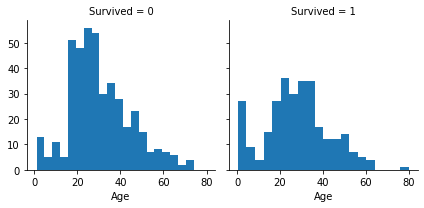

In [35]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

__관측값__

- 유아(Age <= 4)는 높은 생존률을 보였다.
- 나이가 가장 많은 승객들(Age = 80)은 살아남았다.
- 많은 수의 15-25세가 생존하지 못했다.
- 대부분의 승객은 15-35세다.

__결정__

- 모델 학습에서 Age를 고려해야한다. (가정 Classifying #2)
- Age 특징의 null 값을 채운다. (가정 Completing #1)
- Age를 연령대로 나눠야 한다. (가정 Creating #3)

### 수치형과 순서형 특징의 상관 관계

하나의 plot을 이용해 상관 관계를 파악하기 위해 여러 특징을 결합할 수 있다. 숫자 값이 있는 수치형과 범주형 특징이 가능하다.

C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


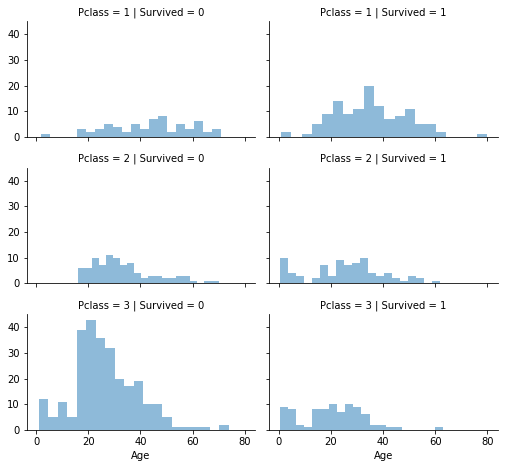

In [36]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

__관측값__

- Pclass=3에 가장 많은 승객이 있었으나, 대부분이 살아남지 못했다. 가정 Classifying #2를 확인한다. (???)
- Pclass=2와 Pclass=3에 있는 유아 승객은 대부분 생존했다. 가정 Classyfing #2를 검증한다.
- Pclass=1의 승객 대부분이 살아남았다. 가정 Classyinf #3을 확인한다.
- Pclass는 승객의 연령 분포에 따라 다르다.

__결정__

- 모델 학습에 Pclass를 고려한다.

### 범주형 특징의 상관관계

C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


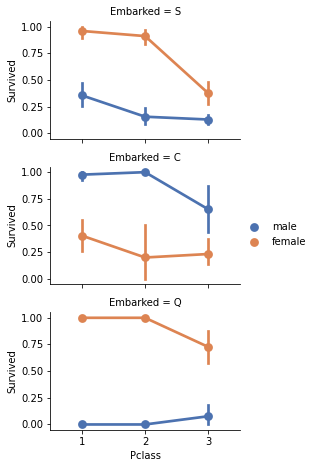

In [37]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

__관측값__

- 여성 승객이 남성보다 훨씬 높은 생존율을 보였다. 가정 Classifying #1을 확인한다.
- Embarked=C는 예외로, 남성이 더 높은 생존율을 보인다.이것은 Pclass와 Embarked 그리고 Pclass와 Survived 사이의 상관 관계 일 수 있지만 반드시 Embarked와 Survived가 직접적인 상관 관계가 있는 것은 아니다.
- 남성은 C와 Q 포트의 경우에, Pclass=2와 비교했을 때 Pclass=3의 생존율이 더 높다. (가정 Completing #2)
- 승선항은 Pclass=3과 남성 승객의 생존율이 다르다. (가정 Correlating #1) (???)

__결정__

- 모델 학습에 Sex 특징을 추가한다.
- 모델 학습을 위해 Embarked 특징을 완성하고, 추가한다.

### 범주형과 수치형 특징의 상관관계

범주형 특징(숫자가 아닌 값으로 구성)과 숫자 특징을 연관시킬 수 있다. Embarked(범주형 비숫자), Sex(범주형 비숫자), Fare(연속형 숫자)와 Survived(범주형 숫자)의 상관 관계를 고려할 수 있다.

C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\tesserocr\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


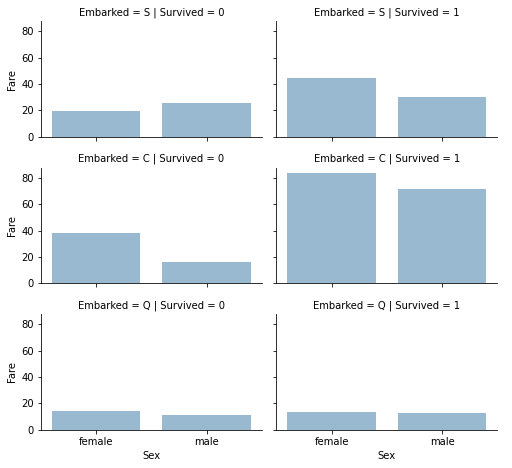

In [38]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

__관측값__

- 더 높은 요금을 지불한 승객은 더 나은 생존율을 보였다. 가정 Creating #4를 확인한다.
- 승선항은 생존율과 관련이 있다. 가정 Correlating #1과 Completing #2를 확인한다.

__결정__

- 운임 범위 특징을 고려한다.

-------------------------------------------------------------------------

데이터를 불러오고, 분석하여 전처리를 해줘야 하는 데이터를 골라냈다.